# Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:	Yotam 1393
# student 2:    Roei 9740
# studentt 3:	Raziel 1405

## Part 2 - Experiments
You could add as many code cells as needed

#### IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

results_list = []


#### LOAD TRAIN & TEST 

In [3]:
# Load datasets
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')

# Print the first 5 rows of the datasets
print(train_df.head(5))
print()
print(test_df.head(5))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [4]:
train = train_df.copy()
test = test_df.copy()

#### VISUALIZE


Train Dataset Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000  

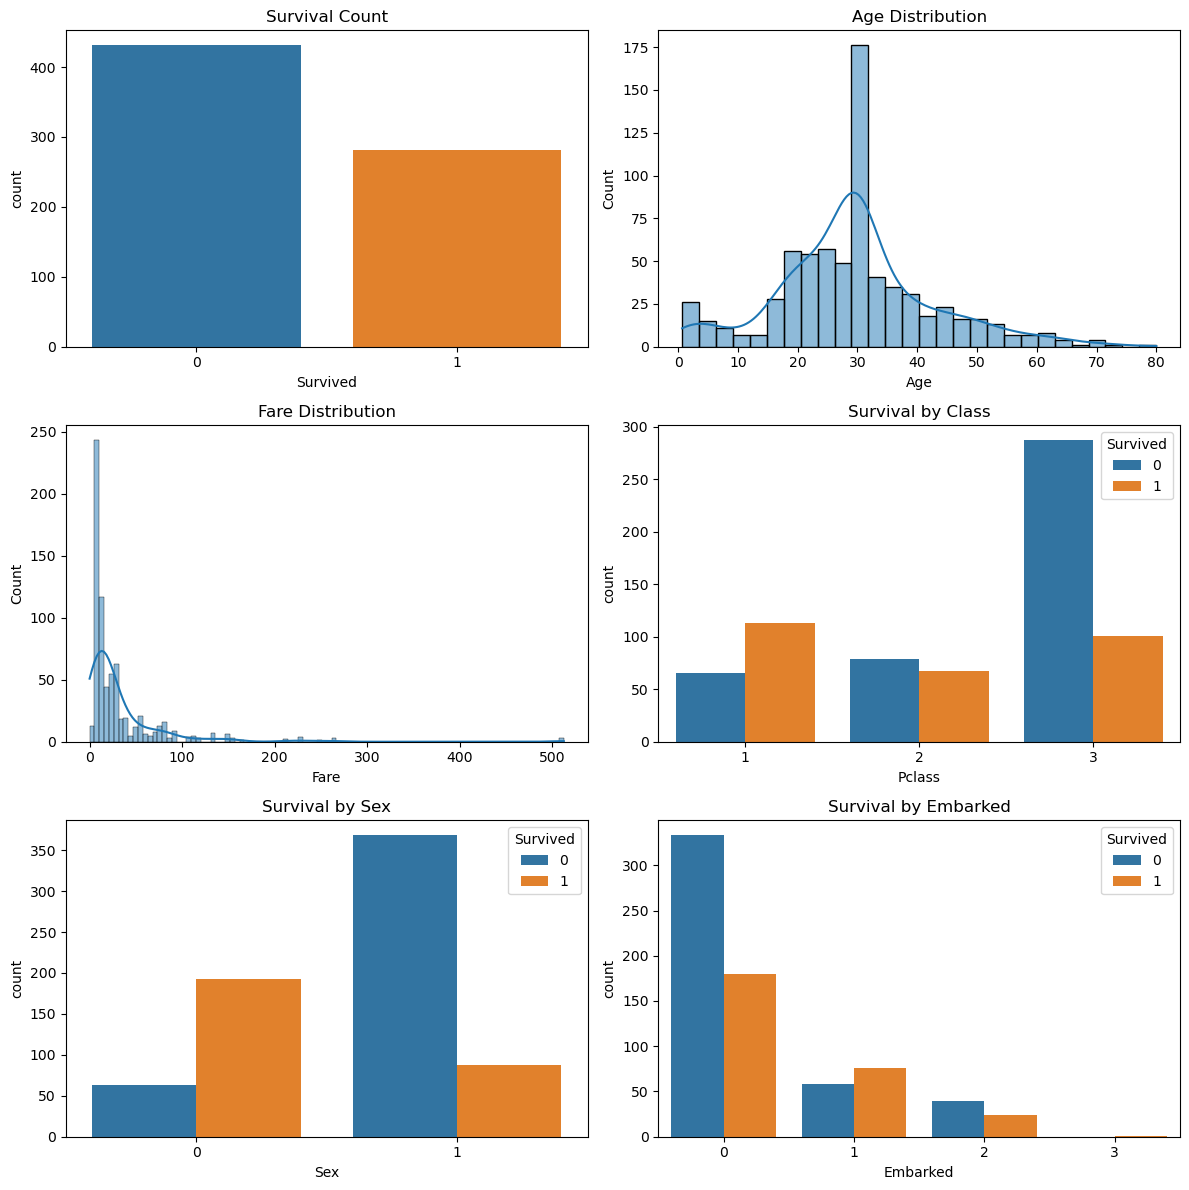

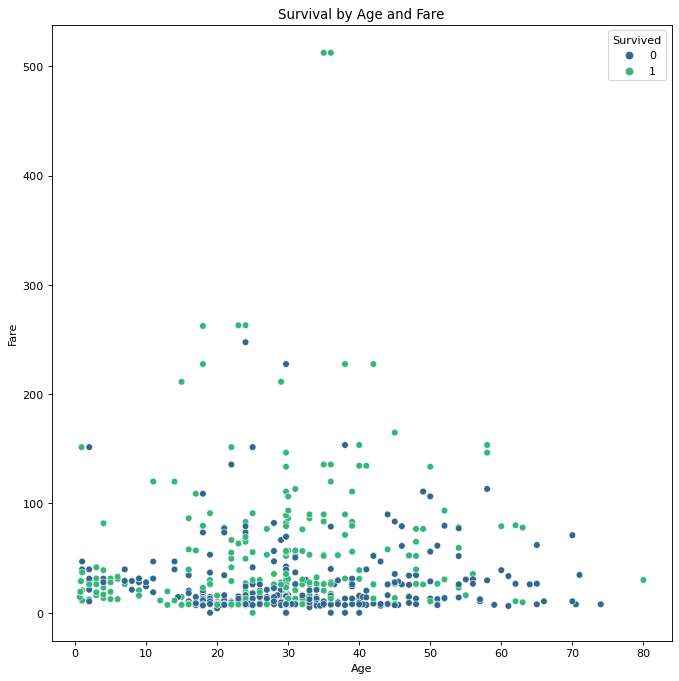

In [5]:
# Basic statistics
print("\nTrain Dataset Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing values in Train Dataset:")
print(train_df.isnull().sum())

# Visualizations
# Create a figure with a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Survival Count
sns.countplot(data=train_df, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')

# Age Distribution
sns.histplot(data=train_df, x='Age', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

# Fare Distribution
sns.histplot(data=train_df, x='Fare', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution')

# Survival by Class
sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival by Class')

# Survival by Sex
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=axes[2, 0])
axes[2, 0].set_title('Survival by Sex')

# Survival by Embarked
sns.countplot(data=train_df, x='Embarked', hue='Survived', ax=axes[2, 1])
axes[2, 1].set_title('Survival by Embarked')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# scatter plot of survival by age and fare
plt.figure(figsize=(10, 10), dpi=80)
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='viridis')
plt.title('Survival by Age and Fare')
plt.show()


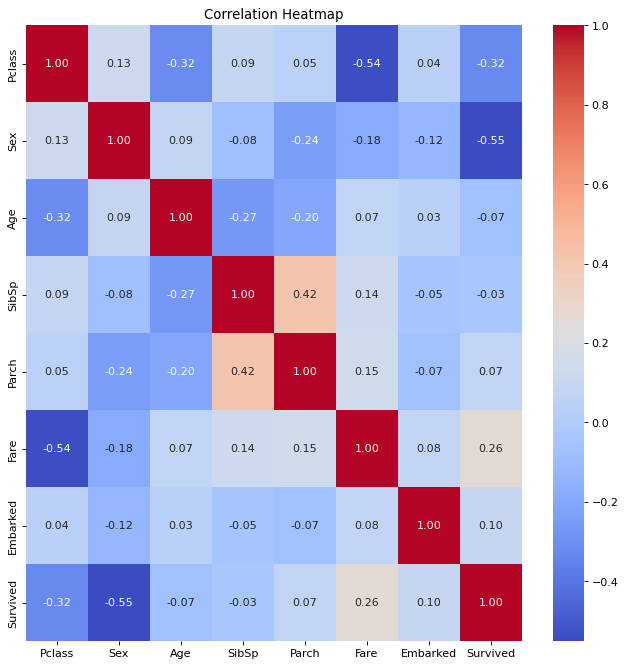

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Survival by age')

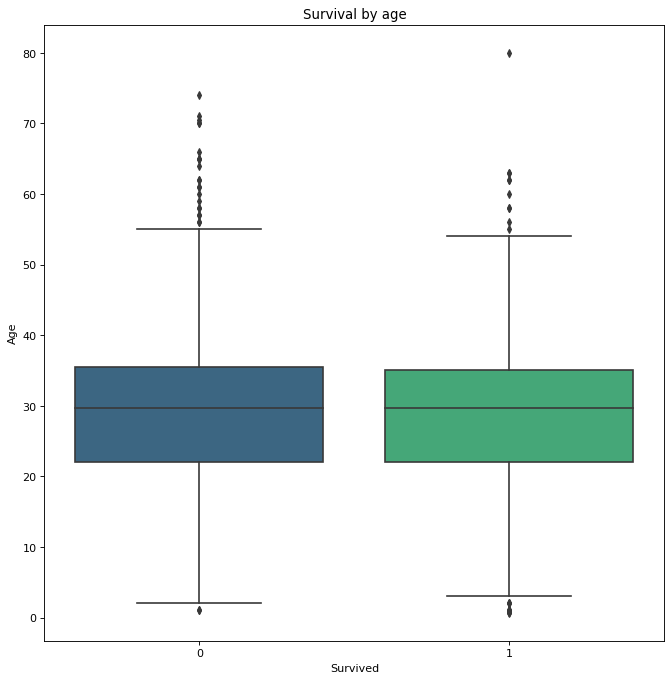

In [7]:
plt.figure(figsize=(10, 10), dpi=80)
sns.boxplot(data=train_df, x='Survived', y='Age', palette='viridis')
plt.title('Survival by age')

### ALGORITHMS BEFORE FEATURE ENGINEERING

#### PRE-PIPES

In [8]:
num_features = ['Fare', 'Age']
cat_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

# Create transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=np.nan))])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Target variable is 'Survived'
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

#### DECISION TREES

In [9]:
param_grid = {'classifier__random_state': [42],
			  'classifier__max_depth': [3, 5, 7, 9, 11],
			  'classifier__min_samples_split': [2, 5, 10, 20],
			  'classifier__min_samples_leaf': [1, 2, 4, 5, 8]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', DecisionTreeClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'DECISION TREES BEFORE FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})

Best cross-validation score:  0.7973444657528379
Best parameters:  {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__random_state': 42}


#### KNN

In [10]:
param_grid = {'classifier__n_neighbors': list(range(1, 30)),
			  'classifier__weights': ['uniform', 'distance'],
			  'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
			  'classifier__p': [1, 2, 3]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', KNeighborsClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'KNN BEFORE FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})

Best cross-validation score:  0.7959269213182605
Best parameters:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 13, 'classifier__p': 1, 'classifier__weights': 'uniform'}


#### NAIVE BAYES

In [11]:
param_grid = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
			  'classifier__priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', GaussianNB())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'NAIVE BAYES BEFORE FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})

Best cross-validation score:  0.7691309905944091
Best parameters:  {'classifier__priors': [0.5, 0.5], 'classifier__var_smoothing': 1e-09}


### FEATURE ENGINEERING

In [12]:
# turn Pclass into different columns 
train_df = pd.get_dummies(train_df, columns=['Pclass'])
train_df.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

test_df = pd.get_dummies(test_df, columns=['Pclass'])
test_df.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

print(train_df.head())

   Sex   Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0    0  54.0      1      0  78.2667         1         1        1         0   
1    0  45.0      0      0  13.5000         0         1        0         1   
2    1  20.0      0      0   9.5000         0         0        0         0   
3    1  36.0      0      0   7.8958         0         0        0         0   
4    1  22.0      0      0   8.0500         0         0        0         0   

   Economy  
0        0  
1        0  
2        1  
3        1  
4        1  


In [13]:
# turn Sex into different columns male, female
train_df = pd.get_dummies(train_df, columns=['Sex'])
train_df.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

print(train_df.head())


    Age  SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  \
0  54.0      1      0  78.2667         1         1        1         0   
1  45.0      0      0  13.5000         0         1        0         1   
2  20.0      0      0   9.5000         0         0        0         0   
3  36.0      0      0   7.8958         0         0        0         0   
4  22.0      0      0   8.0500         0         0        0         0   

   Economy  Male  Female  
0        0     1       0  
1        0     1       0  
2        1     0       1  
3        1     0       1  
4        1     0       1  


In [14]:
# create a new column 'Age_Class' which bins the age into 4 categories: 'child' 0-12 , 'teenager' 12-18, 'adult' 18-60, 'senior' 60-120

train_df['Age_Class'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
train_df = pd.get_dummies(train_df, columns=['Age_Class'])
train_df.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)
train_df.drop('Age', axis=1, inplace=True)

test_df['Age_Class'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
test_df = pd.get_dummies(test_df, columns=['Age_Class'])
test_df.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)
test_df.drop('Age', axis=1, inplace=True)

print(train_df.head())

   SibSp  Parch     Fare  Embarked  Survived  Premium  Buisness  Economy  \
0      1      0  78.2667         1         1        1         0        0   
1      0      0  13.5000         0         1        0         1        0   
2      0      0   9.5000         0         0        0         0        1   
3      0      0   7.8958         0         0        0         0        1   
4      0      0   8.0500         0         0        0         0        1   

   Male  Female  Child  Teenager  Adult  Senior  
0     1       0      0         0      1       0  
1     1       0      0         0      1       0  
2     0       1      0         0      1       0  
3     0       1      0         0      1       0  
4     0       1      0         0      1       0  


### ALGORITHMS

#### PRE-PIPES

In [15]:
num_features = ['Fare']
cat_features = ['Premium', 'Buisness', 'Economy', 'Male', 'Female', 'Child', 'Teenager', 'Adult', 'Senior', 'Embarked', 'SibSp', 'Parch']

# Create transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=np.nan))])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Target variable is 'Survived'
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

#### DECISION TREES

In [16]:
param_grid = {'classifier__random_state': [42],
			  'classifier__max_depth': [3, 5, 7, 9, 11],
			  'classifier__min_samples_split': [2, 5, 10, 20],
			  'classifier__min_samples_leaf': [1, 2, 4, 5, 8]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', DecisionTreeClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'DECISION TREES AFTER FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})

Best cross-validation score:  0.8097125848524754
Best parameters:  {'classifier__max_depth': 11, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__random_state': 42}


#### KNN

In [17]:
param_grid = {'classifier__n_neighbors': list(range(1, 30)),
			  'classifier__weights': ['uniform', 'distance'],
			  'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
			  'classifier__p': [1, 2, 3]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', KNeighborsClassifier())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'KNN AFTER FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})


Best cross-validation score:  0.7996407324227042
Best parameters:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'uniform'}


#### NAIVE BAYES

In [18]:
param_grid = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
			  'classifier__priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
						   ('classifier', GaussianNB())])

grid_clf = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)
grid_clf.fit(X_train, y_train)

print("Best cross-validation score: ", grid_clf.best_score_)
print("Best parameters: ", grid_clf.best_params_)

results_list.append({
    'classifier': 'NAIVE BAYES AFTER FEATURE ENGINEERING',
    'score': grid_clf.best_score_,
    'best params': list(grid_clf.best_params_.keys()),
    'best values': list(grid_clf.best_params_.values())
})

Best cross-validation score:  0.7839773410008164
Best parameters:  {'classifier__priors': None, 'classifier__var_smoothing': 1e-09}


## RESULTS TABLE

In [19]:
# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Display the DataFrame
print(results_df.T)

                                                             0  \
classifier           DECISION TREES BEFORE FEATURE ENGINEERING   
score                                                 0.797344   
best params  [classifier__max_depth, classifier__min_sample...   
best values                                      [3, 4, 2, 42]   

                                                             1  \
classifier                      KNN BEFORE FEATURE ENGINEERING   
score                                                 0.795927   
best params  [classifier__metric, classifier__n_neighbors, ...   
best values                        [manhattan, 13, 1, uniform]   

                                                           2  \
classifier            NAIVE BAYES BEFORE FEATURE ENGINEERING   
score                                               0.769131   
best params  [classifier__priors, classifier__var_smoothing]   
best values                              [[0.5, 0.5], 1e-09]   

                 

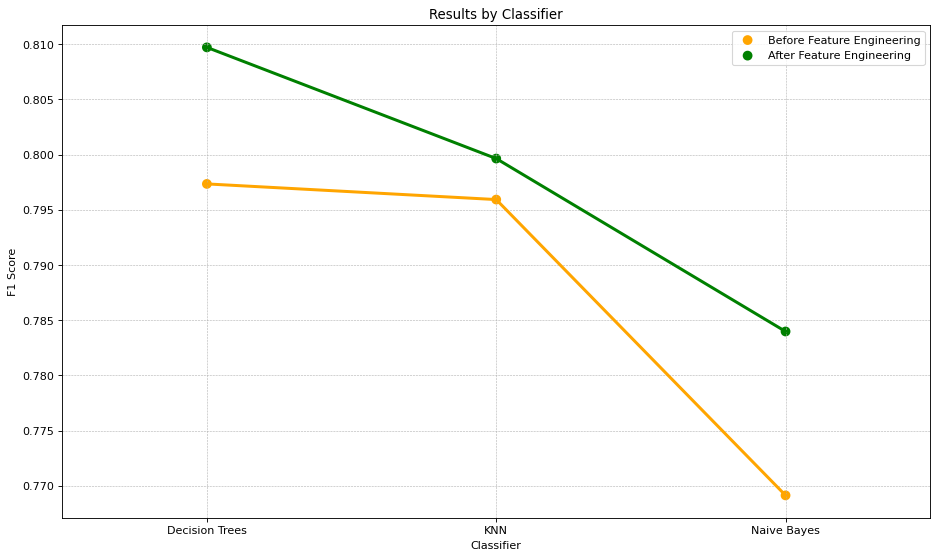

In [20]:
# point plot of the results by 2 lines for BEFORE and AFTER feature engineering
plt.figure(figsize=(14, 8), dpi=80)
sns.pointplot(data=results_df.iloc[:3], x=['Decision Trees', 'KNN', 'Naive Bayes'], y='score',color='orange', label='Before Feature Engineering')
sns.pointplot(data=results_df.iloc[3:], x=['Decision Trees', 'KNN', 'Naive Bayes'], y='score',color='green', label='After Feature Engineering')
plt.title('Results by Classifier')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.grid(axis='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [21]:
train = pd.get_dummies(train, columns=['Pclass'])
train.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

test = pd.get_dummies(test, columns=['Pclass'])
test.rename(columns={'Pclass_1' : 'Premium', 'Pclass_2' : 'Buisness', 'Pclass_3' : 'Economy'}, inplace=True)

train = pd.get_dummies(train, columns=['Sex'])
train.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

test = pd.get_dummies(test, columns=['Sex'])
test.rename(columns={'Sex_0' : 'Male', 'Sex_1' : 'Female'}, inplace=True)

train['Age_Class'] = pd.cut(train['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
train = pd.get_dummies(train, columns=['Age_Class'])
train.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)
train.drop('Age', axis=1, inplace=True)

test['Age_Class'] = pd.cut(test['Age'], bins=[0, 12, 18, 60, 120], labels=['child', 'teenager', 'adult', 'senior'])
test = pd.get_dummies(test, columns=['Age_Class'])
test.rename(columns={'Age_Class_child' : 'Child', 'Age_Class_teenager' : 'Teenager', 'Age_Class_adult' : 'Adult', 'Age_Class_senior' : 'Senior'}, inplace=True)
test.drop('Age', axis=1, inplace=True)

In [22]:
num_features = ['Fare']
cat_features = ['Premium', 'Buisness', 'Economy', 'Male', 'Female', 'Child', 'Teenager', 'Adult', 'Senior', 'Embarked', 'SibSp', 'Parch']

# Create transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=np.nan))])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Target variable is 'Survived'
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop('Survived', axis=1)
y_test = test['Survived']

In [23]:
# Create a pipeline that combines the preprocessor with a classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
					  ('classifier', DecisionTreeClassifier(max_depth=11, min_samples_leaf=1, min_samples_split=10, random_state=42))])

# Fit the pipeline to the training data
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='constant'))]),
                                                  ['Premium', 'Buisness',
                                                   'Economy', 'Male', 'Female',
            

## Part 4 - Apply on test and show model performance estimation

In [24]:
# Use the pipeline to predict labels for the test data
predictions = clf.predict(test)

# Evaluate the model
f1 = f1_score(y_test, predictions, average='macro')
print("F1 Score: ", f1)
print()

# Print the first 5 rows of the test dataset with the predictions
compare_df = test.copy()

# move the 'Survived' column to the end
cols = list(compare_df.columns.values)
cols.remove('Survived')
cols.append('Survived')
compare_df = compare_df[cols]

# Add a column with the predictions
compare_df['Survived_predicted'] = predictions

print(compare_df.head(5))


F1 Score:  0.8469649472784269

   SibSp  Parch     Fare  Embarked  Premium  Buisness  Economy  Male  Female  \
0      0      0   7.0500         0        0         0        1     0       1   
1      0      0   7.2500         0        0         0        1     0       1   
2      0      0  14.5000         0        0         0        1     0       1   
3      0      0   7.7500         2        0         0        1     1       0   
4      0      0  56.4958         0        0         0        1     0       1   

   Child  Teenager  Adult  Senior  Survived  Survived_predicted  
0      0         0      1       0         0                   0  
1      0         0      1       0         0                   0  
2      0         0      1       0         0                   0  
3      0         0      1       0         0                   1  
4      0         0      1       0         1                   1  
